# Gated Recurrent Unit

In [1]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/gru"

TRAIN_RATIO = 0.70
VAL_RATIO = 0.20
TEST_RATIO = 0.10
RANDOM_STATE = 42

In [2]:
from keras import models, layers, optimizers, callbacks
from matplotlib import font_manager, pyplot as plt
from joblib import load
from pathlib import Path
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataset_type import Dataset
import numpy as np

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

2025-03-24 12:39:44.194152: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 12:39:44.205399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742794784.218839   73202 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742794784.222603   73202 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742794784.232250   73202 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [4]:
datasets: dict[str, Dataset] = load(DATASET_FILE)
results: dict[str, float | int] = []

In [5]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len])

    return np.array(X_seq), np.array(y_seq)

Sequence Length: 1


I0000 00:00:1742794786.844415   73202 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1230 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1742794789.828002   73402 service.cc:152] XLA service 0x1d790190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742794789.828016   73402 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-24 12:39:49.888493: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742794790.306338   73402 cuda_dnn.cc:529] Loaded cuDNN version 90300


 90/350 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3761 - mae: 2.0678 

I0000 00:00:1742794792.777769   73402 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 3.7021 - mae: 1.2742 - val_loss: 0.7900 - val_mae: 0.6311
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9426 - mae: 0.7396 - val_loss: 0.9828 - val_mae: 0.8072
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9173 - mae: 0.7224 - val_loss: 0.7618 - val_mae: 0.6878
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9198 - mae: 0.7276 - val_loss: 0.8381 - val_mae: 0.6795
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0358 - mae: 0.7812 - val_loss: 1.0645 - val_mae: 0.8521
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9912 - mae: 0.7633 - val_loss: 0.8005 - val_mae: 0.6879
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8944 - mae: 0.7272 - val_loss: 0.7195 - val_mae: 0.6703
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9011 - mae: 0.7260 - val_loss: 0.7656 - val_mae: 0.6867
Epoch 9/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

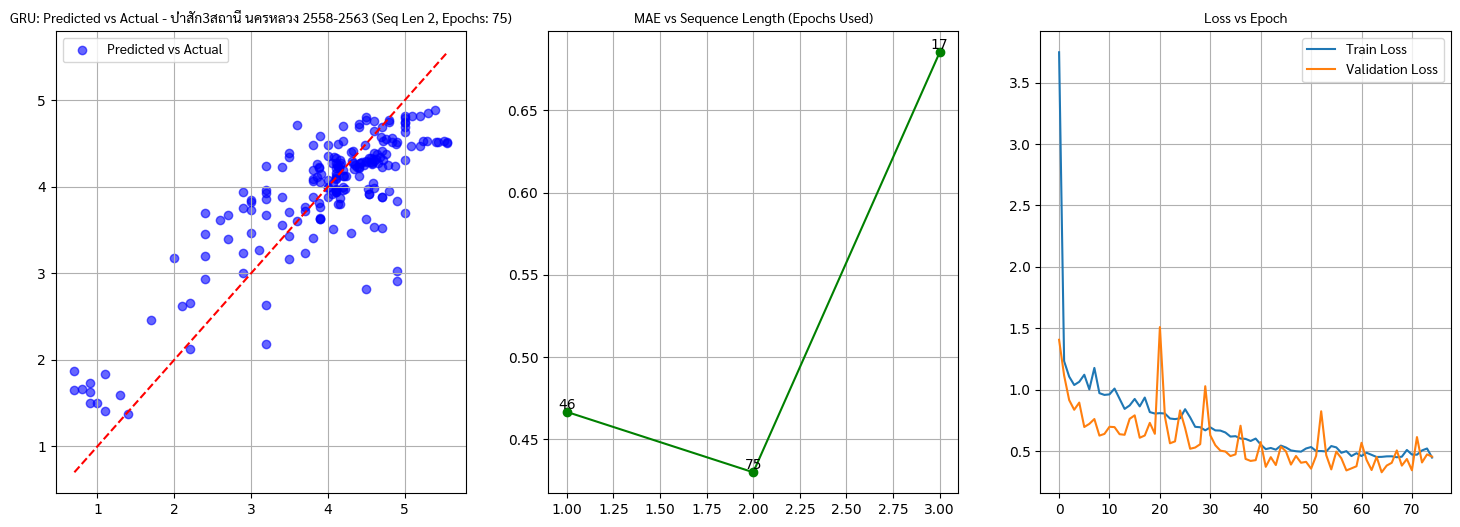

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 6.6236 - mae: 1.3964 - val_loss: 0.6530 - val_mae: 0.6898
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5342 - mae: 0.5778 - val_loss: 0.4067 - val_mae: 0.4966
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4854 - mae: 0.5580 - val_loss: 0.2872 - val_mae: 0.3924
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4814 - mae: 0.5463 - val_loss: 0.3878 - val_mae: 0.5058
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4812 - mae: 0.5568 - val_loss: 0.3088 - val_mae: 0.4197
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4657 - mae: 0.5422 - val_loss: 0.3214 - val_mae: 0.4644
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3704 - mae: 0.4707 - val_loss: 0.4643 - val_mae: 0.5371
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3727 - mae: 0.4688 - val_loss: 0.2833 - val_mae: 0.4242
Epoch 9/100
350/350 ━━━━━━━━━

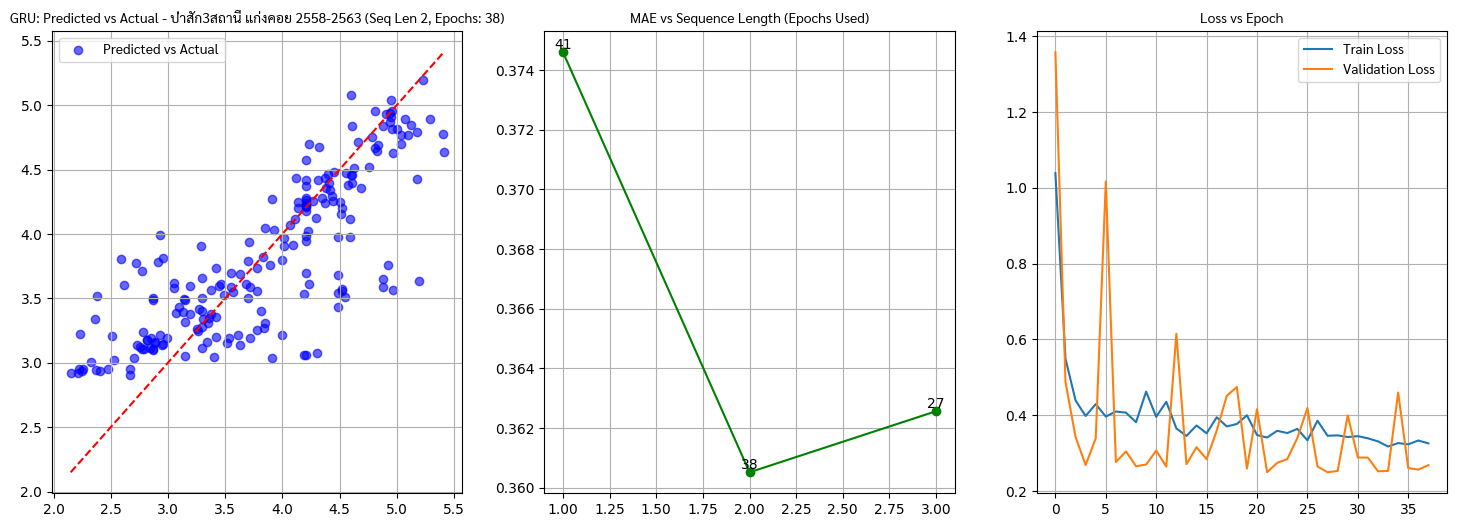

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.4854 - mae: 0.9793 - val_loss: 0.4019 - val_mae: 0.4201
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7850 - mae: 0.6031 - val_loss: 0.3529 - val_mae: 0.3629
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7147 - mae: 0.5659 - val_loss: 1.0042 - val_mae: 0.7806
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8893 - mae: 0.6534 - val_loss: 0.4746 - val_mae: 0.4931
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7884 - mae: 0.5836 - val_loss: 0.4987 - val_mae: 0.4694
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6160 - mae: 0.5257 - val_loss: 0.4882 - val_mae: 0.4200
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7654 - mae: 0.5985 - val_loss: 0.4156 - val_mae: 0.3989
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6199 - mae: 0.5160 - val_loss: 0.3499 - val_mae: 0.3655
Epoch 9/100
350/350 ━━━━━━━━━

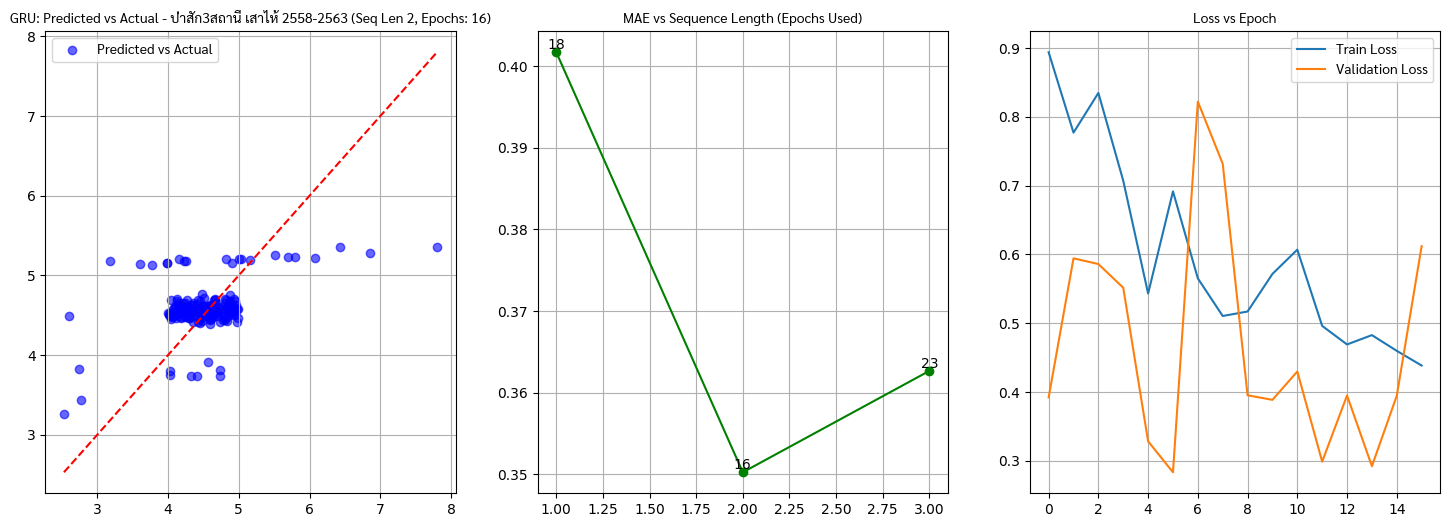

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.2150 - mae: 1.8637 - val_loss: 2.6890 - val_mae: 1.4103
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9796 - mae: 1.2569 - val_loss: 2.3199 - val_mae: 1.0115
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5682 - mae: 1.3555 - val_loss: 2.0744 - val_mae: 0.8940
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9529 - mae: 1.2320 - val_loss: 2.5168 - val_mae: 0.9301
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7694 - mae: 1.2037 - val_loss: 2.1707 - val_mae: 0.8454
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9200 - mae: 1.1974 - val_loss: 2.3306 - val_mae: 0.9309
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3210 - mae: 1.0128 - val_loss: 2.0893 - val_mae: 1.1557
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3737 - mae: 1.0614 - val_loss: 2.4813 - val_mae: 0.9778
Epoch 9/100
350/350 ━━━━━━━━━

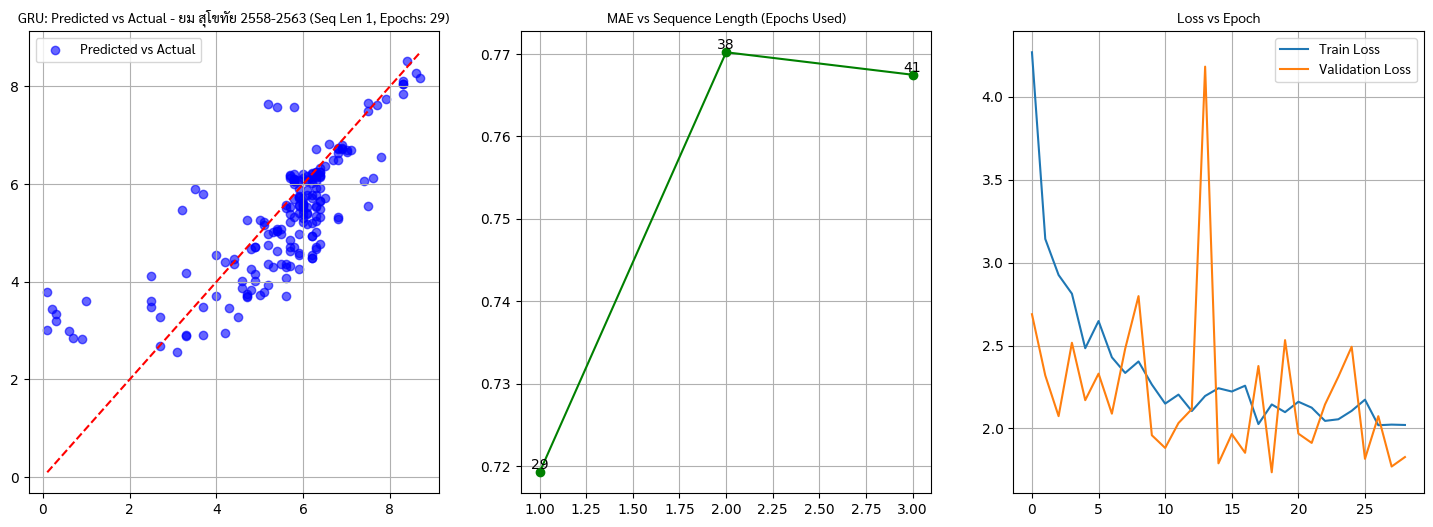

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.3289 - mae: 1.9341 - val_loss: 3.4665 - val_mae: 1.4570
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4305 - mae: 1.4383 - val_loss: 3.2915 - val_mae: 1.2685
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1027 - mae: 1.3325 - val_loss: 3.0066 - val_mae: 1.1647
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0305 - mae: 1.3423 - val_loss: 2.6907 - val_mae: 1.1127
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6816 - mae: 1.2413 - val_loss: 2.4691 - val_mae: 1.2992
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8425 - mae: 1.2668 - val_loss: 3.6726 - val_mae: 1.3601
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3640 - mae: 1.1596 - val_loss: 1.7682 - val_mae: 0.9531
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8396 - mae: 1.0034 - val_loss: 1.7381 - val_mae: 1.0546
Epoch 9/100
350/350 ━━━━━━━━━

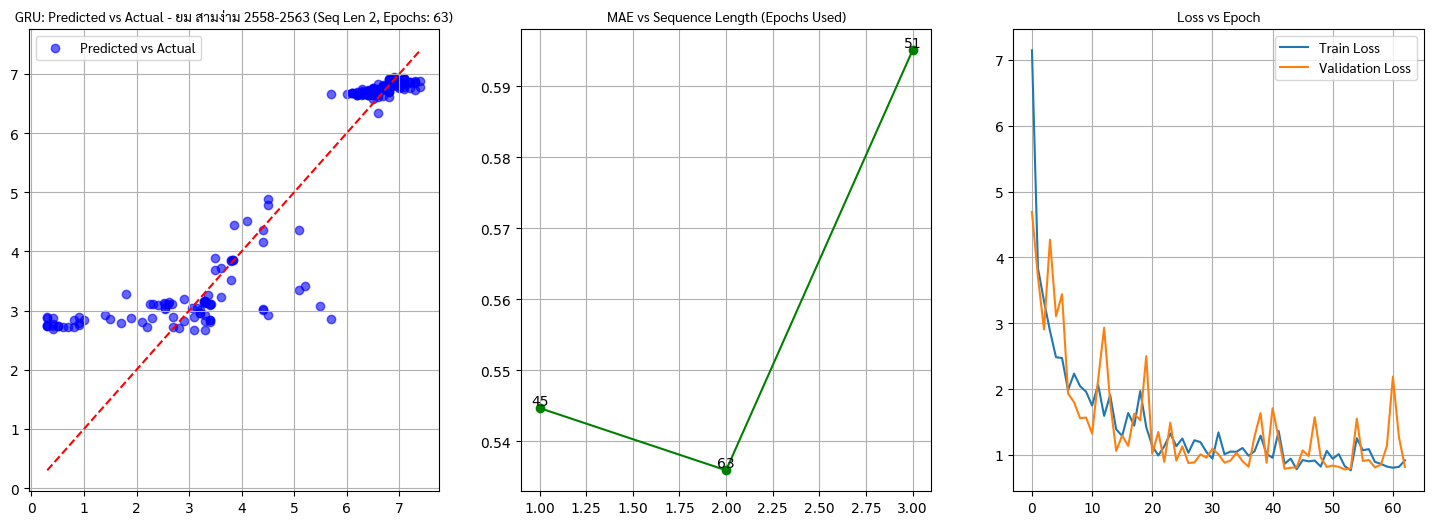

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 16.3738 - mae: 2.2427 - val_loss: 1.4075 - val_mae: 1.0830
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3768 - mae: 0.9940 - val_loss: 1.6856 - val_mae: 1.1444
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1535 - mae: 0.8925 - val_loss: 2.6826 - val_mae: 1.2241
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1758 - mae: 0.8822 - val_loss: 0.8078 - val_mae: 0.7495
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9479 - mae: 0.7875 - val_loss: 1.3970 - val_mae: 1.0090
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9420 - mae: 0.7825 - val_loss: 0.7495 - val_mae: 0.7090
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8975 - mae: 0.7434 - val_loss: 1.2298 - val_mae: 1.0091
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1134 - mae: 0.8801 - val_loss: 1.1795 - val_mae: 0.8043
Epoch 9/100
350/350 ━━━━━━━━

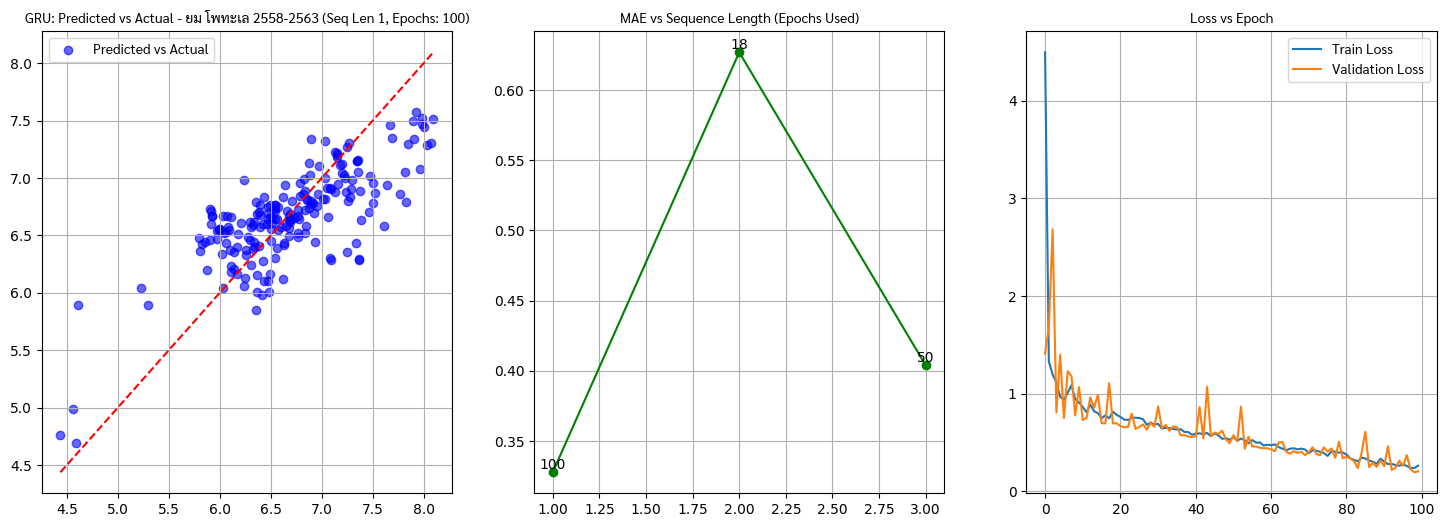

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 17.6089 - mae: 2.5722 - val_loss: 2.8420 - val_mae: 1.3585
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6831 - mae: 1.3584 - val_loss: 3.1252 - val_mae: 1.4193
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0629 - mae: 1.4500 - val_loss: 2.5778 - val_mae: 1.3196
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7938 - mae: 1.3757 - val_loss: 2.5341 - val_mae: 1.3292
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8419 - mae: 1.4025 - val_loss: 2.6792 - val_mae: 1.3764
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5875 - mae: 1.3269 - val_loss: 2.5215 - val_mae: 1.3338
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8389 - mae: 1.3918 - val_loss: 2.6910 - val_mae: 1.3783
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6083 - mae: 1.3467 - val_loss: 2.6313 - val_mae: 1.3620
Epoch 9/100
350/350 ━━━━━━━━

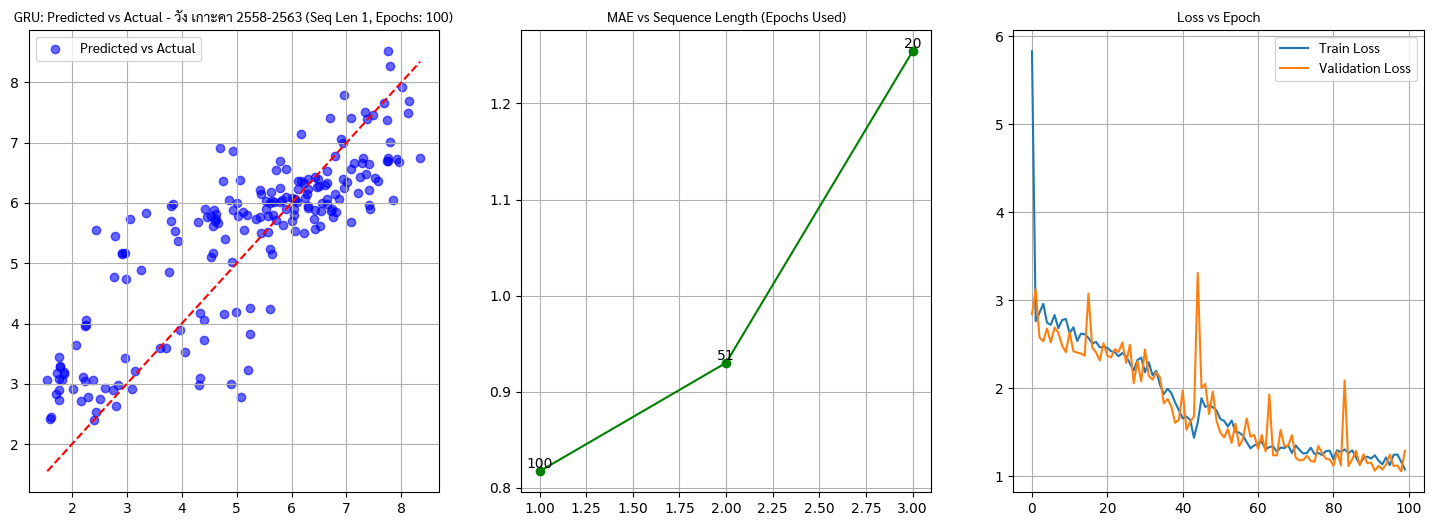

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.7631 - mae: 0.5182 - val_loss: 0.0507 - val_mae: 0.1667
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1010 - mae: 0.2439 - val_loss: 0.0405 - val_mae: 0.1401
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0641 - mae: 0.1967 - val_loss: 0.0887 - val_mae: 0.2425
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0726 - mae: 0.2086 - val_loss: 0.0299 - val_mae: 0.1309
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0704 - mae: 0.2027 - val_loss: 0.0274 - val_mae: 0.1262
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0842 - mae: 0.2274 - val_loss: 0.0358 - val_mae: 0.1276
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0752 - mae: 0.2181 - val_loss: 0.0496 - val_mae: 0.1935
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0590 - mae: 0.1928 - val_loss: 0.0331 - val_mae: 0.1258
Epoch 9/100
350/350 ━━━━━━━━━

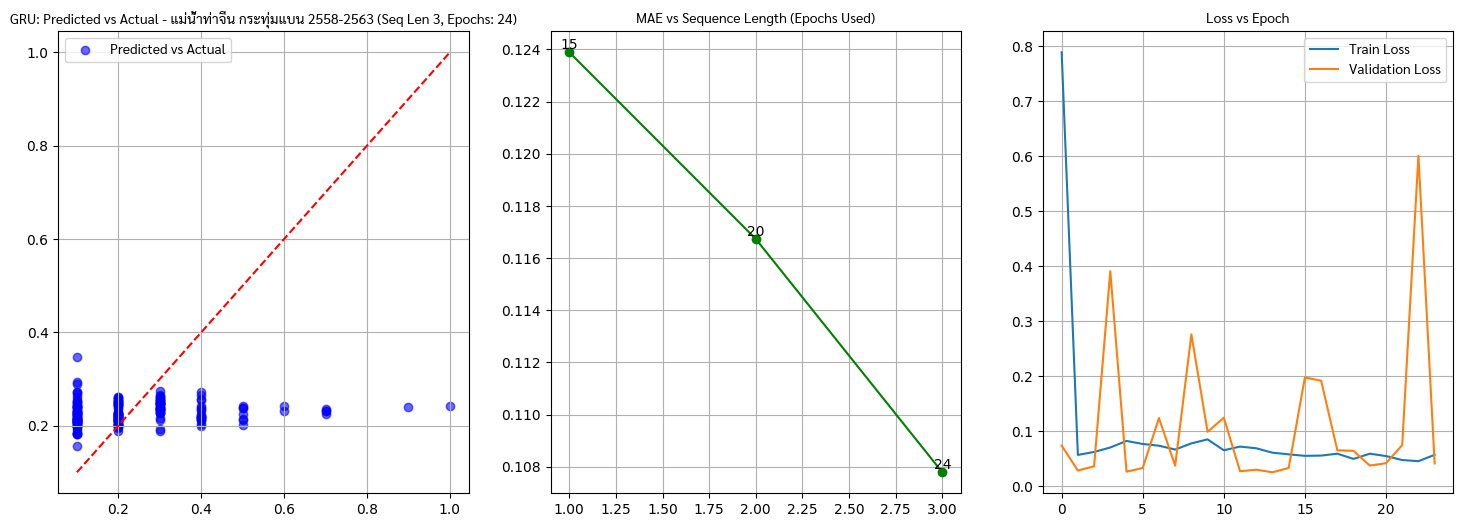

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 28.8239 - mae: 2.6601 - val_loss: 0.4215 - val_mae: 0.4731
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2807 - mae: 0.4137 - val_loss: 0.1294 - val_mae: 0.3019
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2183 - mae: 0.3709 - val_loss: 0.5299 - val_mae: 0.6728
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1657 - mae: 0.3216 - val_loss: 0.5529 - val_mae: 0.5849
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2703 - mae: 0.4048 - val_loss: 0.0658 - val_mae: 0.2075
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2009 - mae: 0.3518 - val_loss: 0.2202 - val_mae: 0.3832
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1700 - mae: 0.3235 - val_loss: 0.0891 - val_mae: 0.2513
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1513 - mae: 0.3108 - val_loss: 0.2097 - val_mae: 0.4018
Epoch 9/100
350/350 ━━━━━━━━

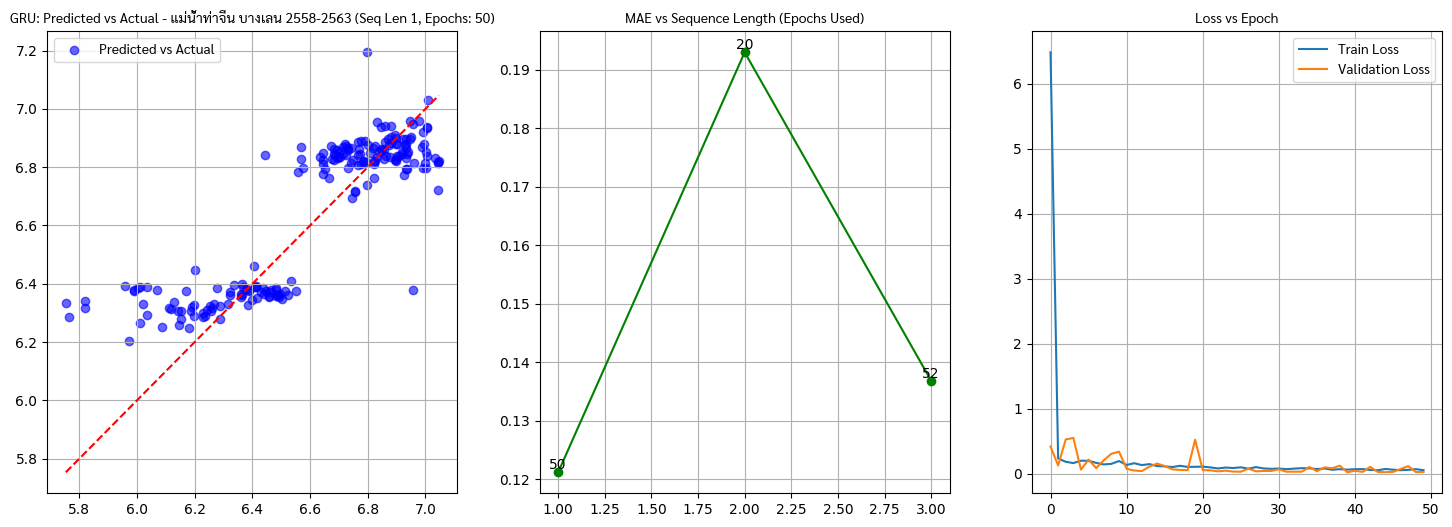

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3352 - mae: 0.4206 - val_loss: 0.1926 - val_mae: 0.3534
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1788 - mae: 0.3352 - val_loss: 0.1306 - val_mae: 0.2870
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1975 - mae: 0.3491 - val_loss: 0.1135 - val_mae: 0.2713
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1931 - mae: 0.3460 - val_loss: 0.3523 - val_mae: 0.5020
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1751 - mae: 0.3329 - val_loss: 0.3134 - val_mae: 0.4571
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1805 - mae: 0.3347 - val_loss: 0.1142 - val_mae: 0.2775
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1392 - mae: 0.2969 - val_loss: 0.2115 - val_mae: 0.3629
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2120 - mae: 0.3637 - val_loss: 0.1896 - val_mae: 0.3768
Epoch 9/100
350/350 ━━━━━━━━━

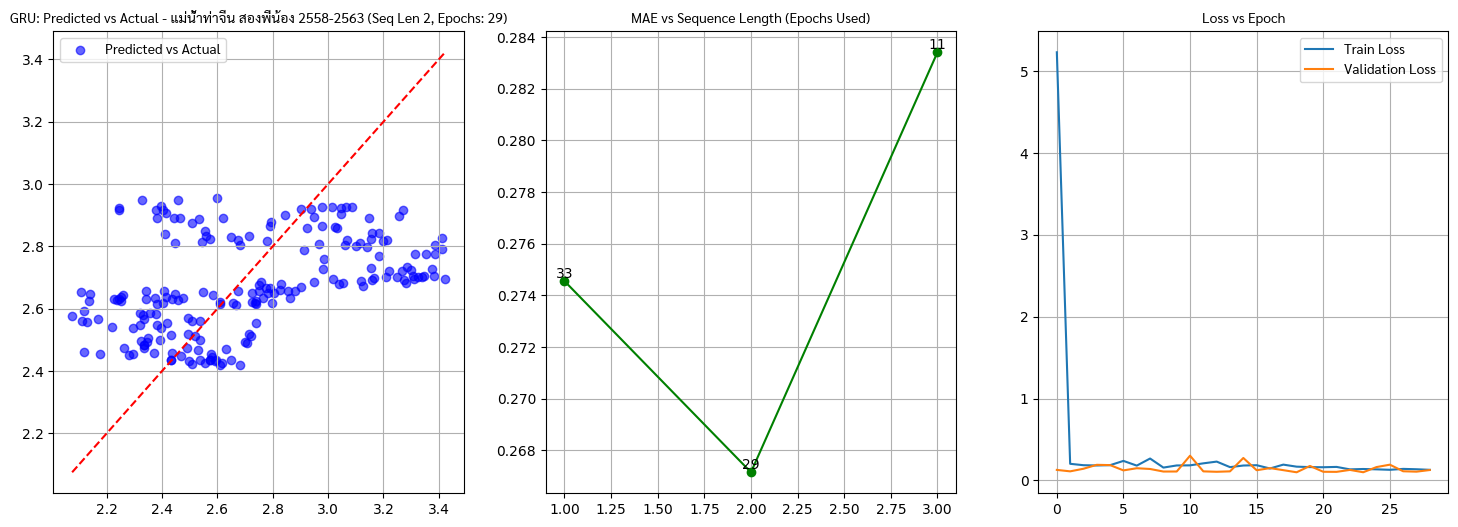

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 17.3017 - mae: 2.0315 - val_loss: 0.6668 - val_mae: 0.6179
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7528 - mae: 0.6885 - val_loss: 0.5906 - val_mae: 0.6135
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6932 - mae: 0.6629 - val_loss: 0.6798 - val_mae: 0.6858
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7473 - mae: 0.6922 - val_loss: 0.8549 - val_mae: 0.7829
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7542 - mae: 0.7024 - val_loss: 0.8312 - val_mae: 0.7721
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8618 - mae: 0.7397 - val_loss: 0.7706 - val_mae: 0.7426
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7086 - mae: 0.6777 - val_loss: 0.5761 - val_mae: 0.6169
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6724 - mae: 0.6535 - val_loss: 0.7693 - val_mae: 0.6566
Epoch 9/100
350/350 ━━━━━━━━

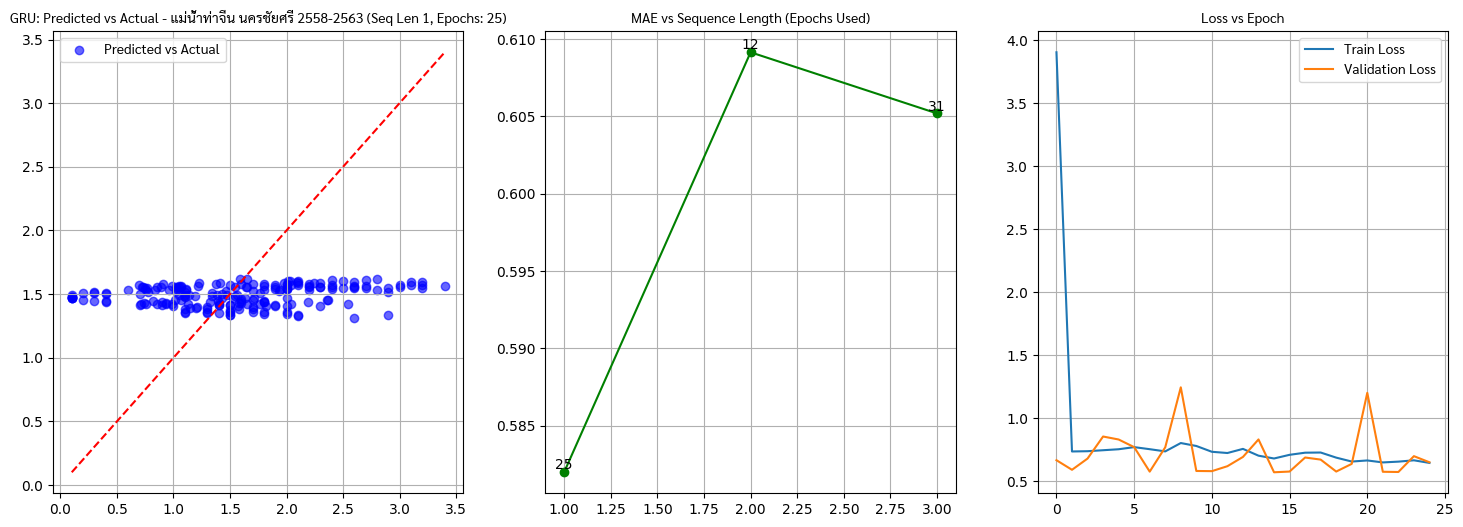

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.5203 - mae: 0.6700 - val_loss: 0.1429 - val_mae: 0.3078
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1879 - mae: 0.3549 - val_loss: 0.1500 - val_mae: 0.3205
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1712 - mae: 0.3344 - val_loss: 0.1382 - val_mae: 0.2910
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1824 - mae: 0.3430 - val_loss: 0.2137 - val_mae: 0.3972
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1648 - mae: 0.3295 - val_loss: 0.1366 - val_mae: 0.3096
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1650 - mae: 0.3299 - val_loss: 0.1161 - val_mae: 0.2785
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1452 - mae: 0.2849 - val_loss: 0.1565 - val_mae: 0.3327
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1826 - mae: 0.3324 - val_loss: 0.1362 - val_mae: 0.2828
Epoch 9/100
350/350 ━━━━━━━━━

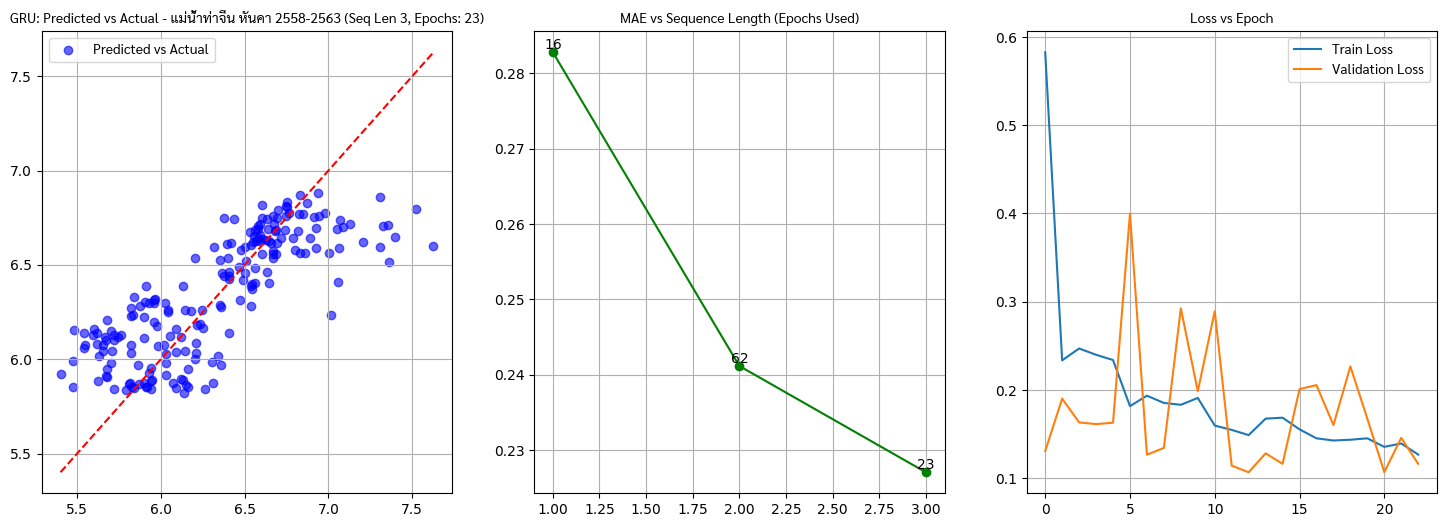

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 3.3091 - mae: 0.9840 - val_loss: 0.3572 - val_mae: 0.5442
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3794 - mae: 0.4890 - val_loss: 0.4236 - val_mae: 0.5958
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3633 - mae: 0.4898 - val_loss: 0.3872 - val_mae: 0.5691
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3896 - mae: 0.5094 - val_loss: 0.4472 - val_mae: 0.6122
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3930 - mae: 0.4987 - val_loss: 0.3564 - val_mae: 0.3960
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3681 - mae: 0.4884 - val_loss: 0.2891 - val_mae: 0.4700
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4221 - mae: 0.5216 - val_loss: 0.2969 - val_mae: 0.3835
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3706 - mae: 0.4880 - val_loss: 1.3604 - val_mae: 1.0686
Epoch 9/100
350/350 ━━━━━━━━━

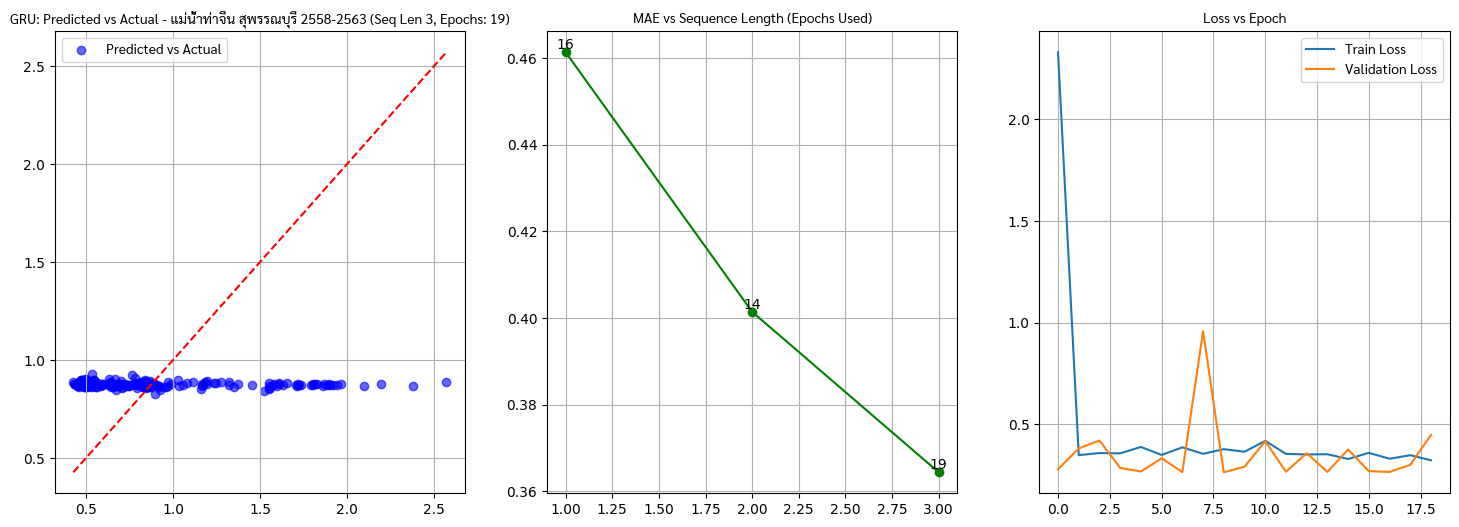

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 24.7122 - mae: 2.1127 - val_loss: 0.6143 - val_mae: 0.6122
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0862 - mae: 0.7742 - val_loss: 0.8012 - val_mae: 0.6950
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6275 - mae: 0.8744 - val_loss: 3.3619 - val_mae: 1.1947
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8995 - mae: 0.7340 - val_loss: 0.5753 - val_mae: 0.6010
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7929 - mae: 0.7102 - val_loss: 2.4205 - val_mae: 1.0419
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3808 - mae: 0.8842 - val_loss: 24.6878 - val_mae: 2.5939
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.8281 - mae: 1.5808 - val_loss: 0.6375 - val_mae: 0.6586
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6584 - mae: 0.6639 - val_loss: 0.6529 - val_mae: 0.6537
Epoch 9/100
350/350 ━━━━━━

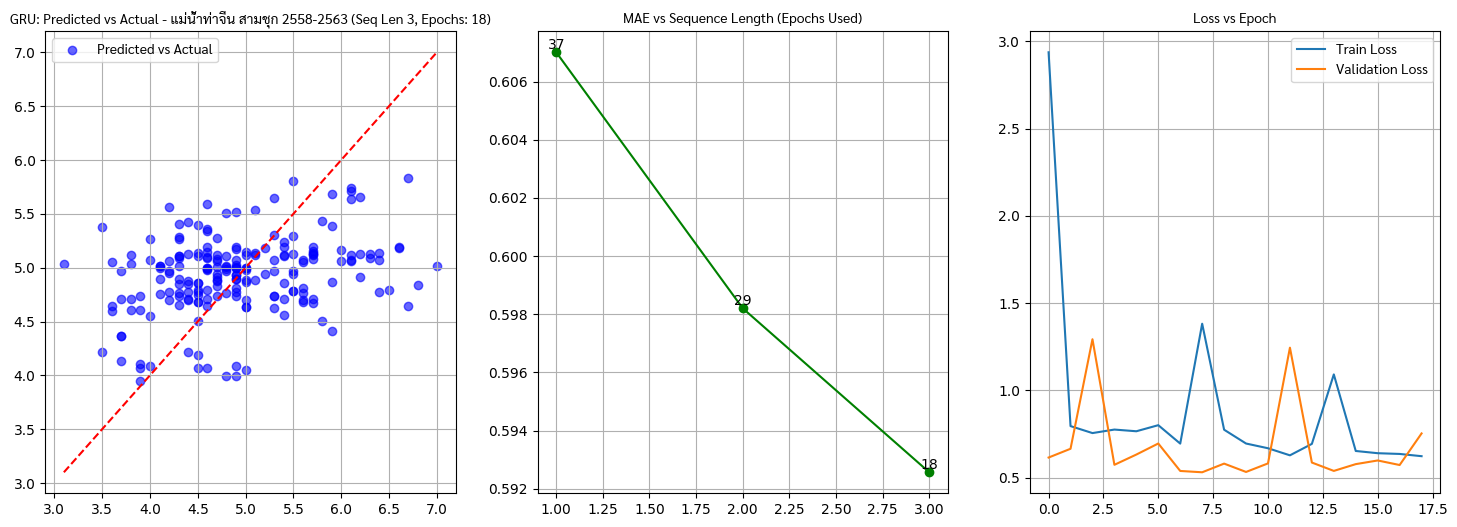

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.8641 - mae: 1.3614 - val_loss: 1.7870 - val_mae: 1.0903
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8978 - mae: 1.0714 - val_loss: 2.3758 - val_mae: 1.3975
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1232 - mae: 1.1518 - val_loss: 2.2742 - val_mae: 1.3349
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0053 - mae: 1.1276 - val_loss: 1.9157 - val_mae: 1.0520
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9471 - mae: 1.1046 - val_loss: 1.8649 - val_mae: 1.1383
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8542 - mae: 1.0783 - val_loss: 1.9803 - val_mae: 1.2172
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0650 - mae: 1.1362 - val_loss: 2.4858 - val_mae: 1.4151
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0633 - mae: 1.1419 - val_loss: 1.7877 - val_mae: 1.0833
Epoch 9/100
350/350 ━━━━━━━━━

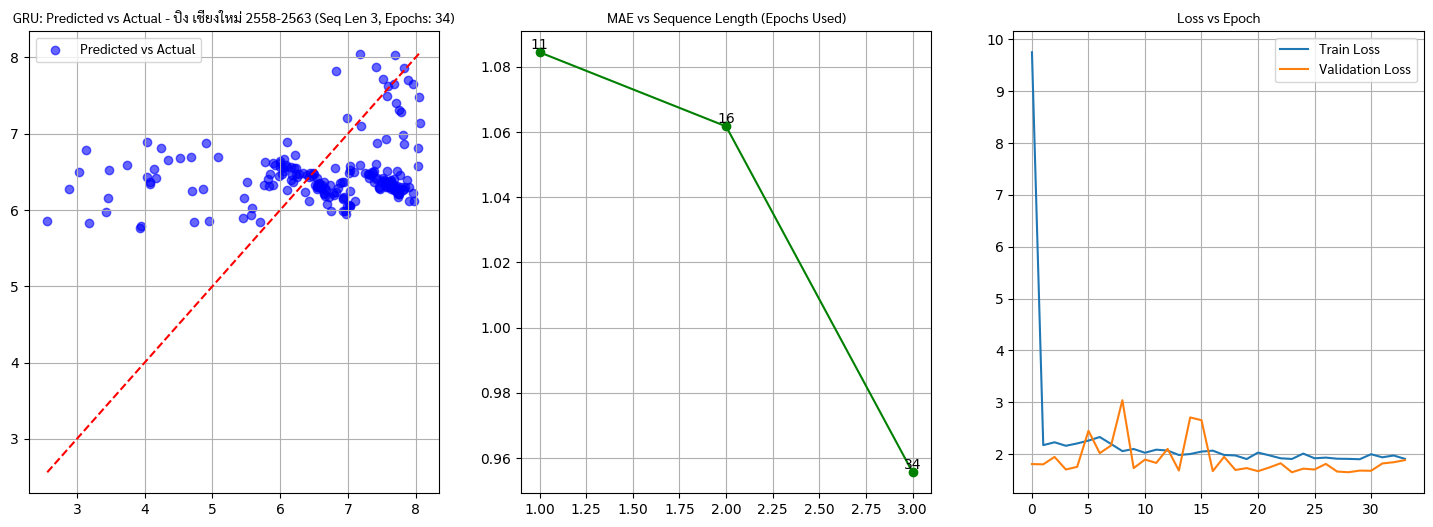

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 11.8474 - mae: 1.7007 - val_loss: 0.3409 - val_mae: 0.4791
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2493 - mae: 0.3922 - val_loss: 0.1923 - val_mae: 0.3481
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2274 - mae: 0.3753 - val_loss: 0.4356 - val_mae: 0.5685
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2327 - mae: 0.3875 - val_loss: 0.1526 - val_mae: 0.3123
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2055 - mae: 0.3683 - val_loss: 0.2722 - val_mae: 0.4347
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2225 - mae: 0.3775 - val_loss: 0.2221 - val_mae: 0.3774
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2739 - mae: 0.4203 - val_loss: 0.1941 - val_mae: 0.3523
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2454 - mae: 0.3942 - val_loss: 0.1667 - val_mae: 0.3206
Epoch 9/100
350/350 ━━━━━━━━

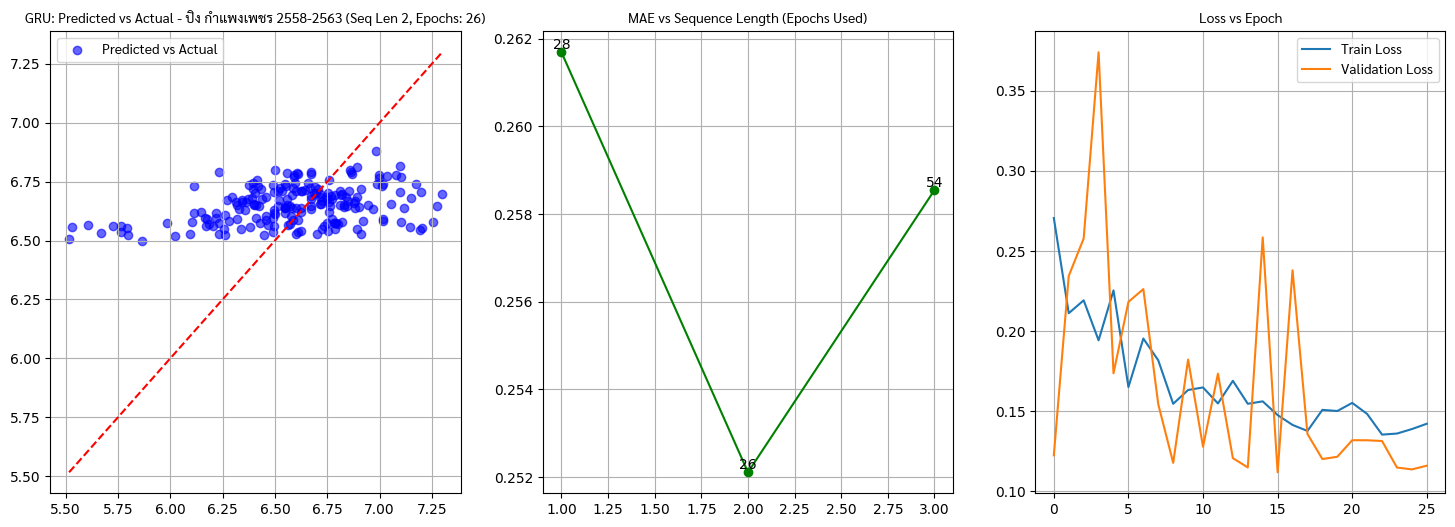

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 8.1781 - mae: 1.4314 - val_loss: 0.1650 - val_mae: 0.3225
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1391 - mae: 0.2813 - val_loss: 0.1526 - val_mae: 0.2906
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1342 - mae: 0.2858 - val_loss: 0.1273 - val_mae: 0.2698
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1739 - mae: 0.2794 - val_loss: 0.1228 - val_mae: 0.2709
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1322 - mae: 0.2750 - val_loss: 0.1161 - val_mae: 0.2624
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1135 - mae: 0.2600 - val_loss: 0.1401 - val_mae: 0.2802
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1225 - mae: 0.2773 - val_loss: 0.2073 - val_mae: 0.3549
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1339 - mae: 0.2867 - val_loss: 0.1150 - val_mae: 0.2538
Epoch 9/100
350/350 ━━━━━━━━━

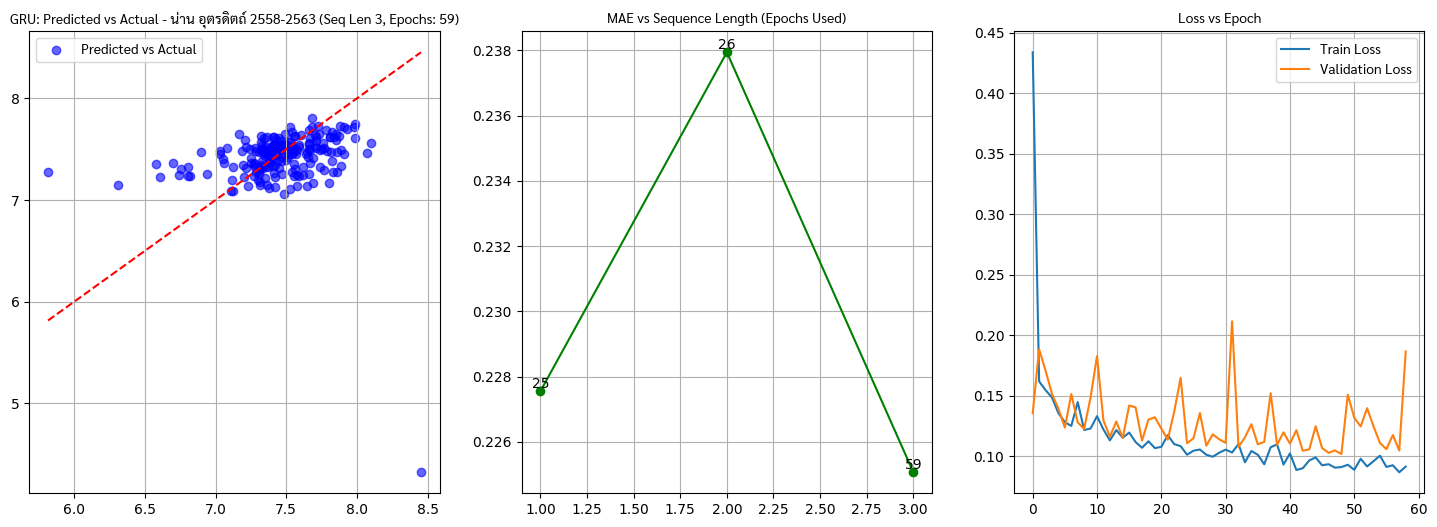

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.9340 - mae: 0.7447 - val_loss: 0.3207 - val_mae: 0.4578
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4244 - mae: 0.5247 - val_loss: 0.2957 - val_mae: 0.4324
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3949 - mae: 0.5035 - val_loss: 0.3843 - val_mae: 0.4898
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4047 - mae: 0.5163 - val_loss: 0.4099 - val_mae: 0.5239
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3543 - mae: 0.4784 - val_loss: 0.2756 - val_mae: 0.4104
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3476 - mae: 0.4790 - val_loss: 0.4456 - val_mae: 0.5515
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3550 - mae: 0.4732 - val_loss: 0.2954 - val_mae: 0.4342
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3912 - mae: 0.5078 - val_loss: 0.3085 - val_mae: 0.4447
Epoch 9/100
350/350 ━━━━━━━━━

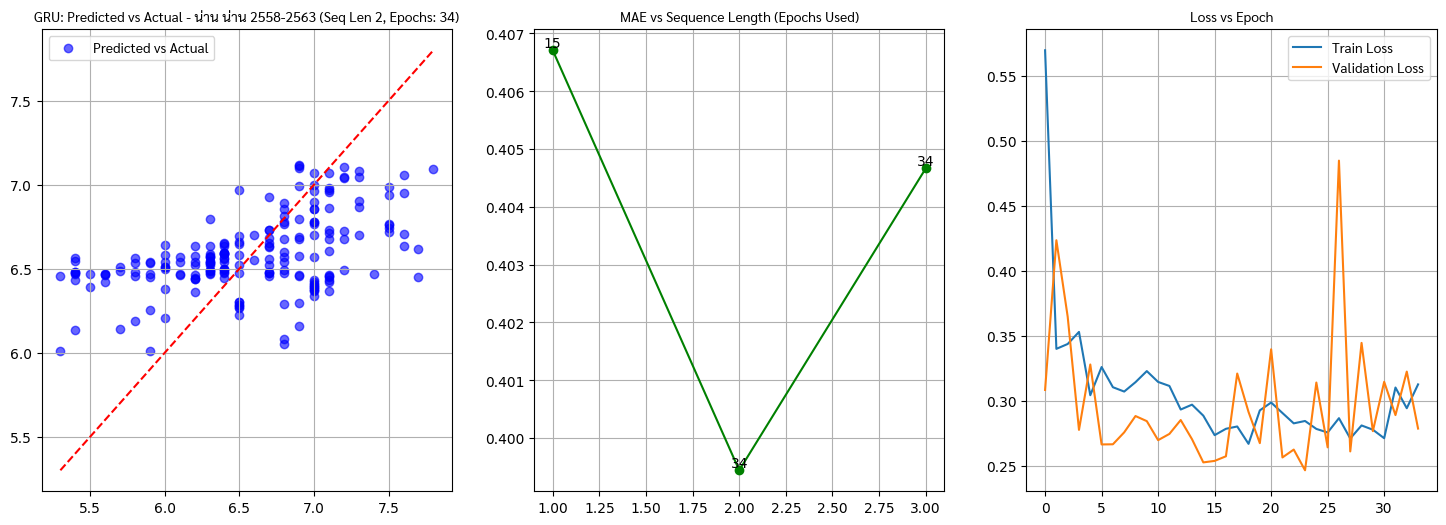

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.5286 - mae: 1.3699 - val_loss: 0.2187 - val_mae: 0.3532
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1951 - mae: 0.3585 - val_loss: 0.1652 - val_mae: 0.3138
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2094 - mae: 0.3706 - val_loss: 0.3035 - val_mae: 0.4560
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2922 - mae: 0.4292 - val_loss: 0.3700 - val_mae: 0.4808
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2492 - mae: 0.4004 - val_loss: 0.3436 - val_mae: 0.4789
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2005 - mae: 0.3572 - val_loss: 0.1639 - val_mae: 0.3183
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2375 - mae: 0.3933 - val_loss: 0.3284 - val_mae: 0.4744
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1977 - mae: 0.3658 - val_loss: 0.1992 - val_mae: 0.3698
Epoch 9/100
350/350 ━━━━━━━━━

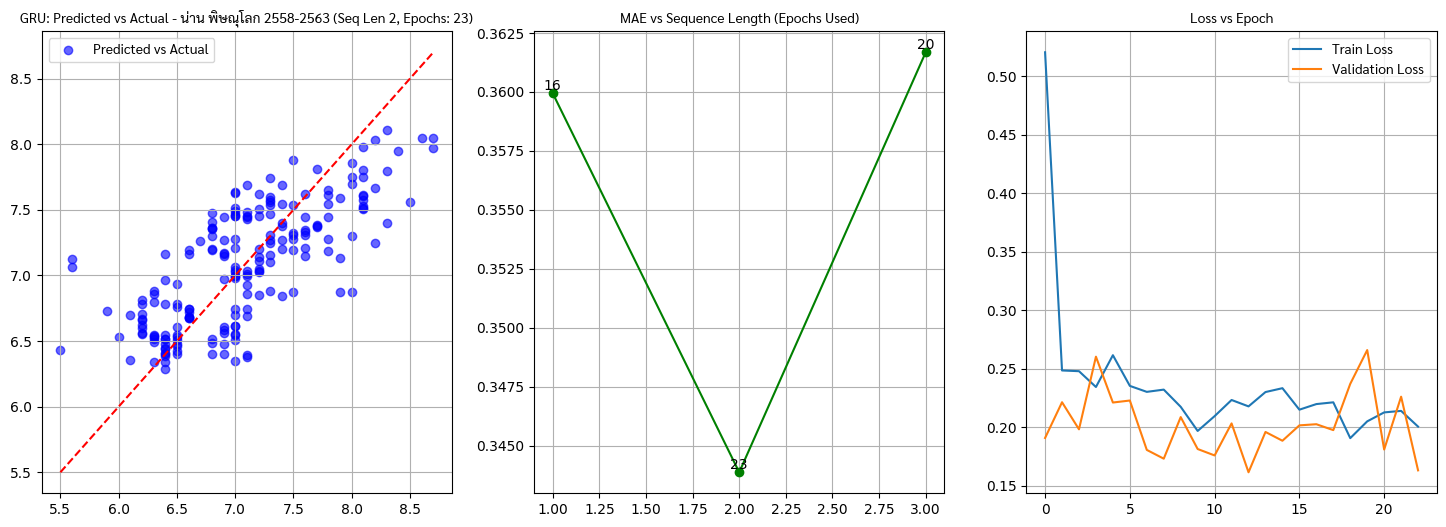

In [6]:
for station, dataset in datasets.items():
    seq_results = []

    for seq_len in range(1, 4):
        print(f"Sequence Length: {seq_len}")
        X, y = create_sequences(dataset.X, dataset.y, seq_len)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=TRAIN_RATIO, random_state=RANDOM_STATE)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_RATIO / (TEST_RATIO + VAL_RATIO), random_state=RANDOM_STATE)

        model = models.Sequential([
            layers.Input(shape=(seq_len, 3)),
            layers.GRU(64, activation="relu", return_sequences=True),
            layers.GRU(32, activation="relu"),
            layers.Dense(1)
        ])

        model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
        history = model.fit(
            X_train, y_train, 
            epochs=100,
            batch_size=4,
            validation_data=(X_val, y_val),
            callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
        )

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        seq_results.append((seq_len, mae, model, y_test, y_pred, history))

    best_len, best_mae, best_model, best_y_test, best_y_pred, best_history = min(seq_results, key=lambda x: x[1])
    best_epochs = len(best_history.history["loss"])

    mae = mean_absolute_error(best_y_test, best_y_pred)
    mse = mean_squared_error(best_y_test, best_y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(best_y_test, best_y_pred)

    best_model.save(OUTPUT_PATH / f"{station}_model.keras")
    results.append({
        "station": station,
        "seq_len": best_len,
        "epochs": best_epochs,
        "mae": best_mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    })

    print(f"Station: {station}")
    print(f"Best Sequence Length: {best_len} (Epochs: {best_epochs})")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].scatter(best_y_test, best_y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    ax[0].plot([min(best_y_test), max(best_y_test)], [min(best_y_test), max(best_y_test)], "r--")
    ax[0].set_title(f"GRU: Predicted vs Actual - {station} (Seq Len {best_len}, Epochs: {best_epochs})", fontproperties=font_prop)
    ax[0].legend(prop=font_prop)
    ax[0].grid()

    seq_lens, maes, _, _, _, histories = zip(*seq_results)
    epochs_used = [len(h.history["loss"]) for h in histories]

    ax[1].plot(seq_lens, maes, marker="o", linestyle="-", color="green")
    for i, (seq_len, mae, epoch) in enumerate(zip(seq_lens, maes, epochs_used)):
        ax[1].text(seq_len, mae, f"{epoch}", ha="center", va="bottom", fontsize=10)
    ax[1].set_title("MAE vs Sequence Length (Epochs Used)", fontproperties=font_prop)
    ax[1].grid()

    ax[2].plot(best_history.history["loss"], label="Train Loss")
    ax[2].plot(best_history.history["val_loss"], label="Validation Loss")
    ax[2].set_title("Loss vs Epoch", fontproperties=font_prop)
    ax[2].legend(prop=font_prop)
    ax[2].grid()

    plt.savefig(OUTPUT_PATH / f"gru-pred-actual-{station}.png")
    plt.show()

In [7]:
results_df = DataFrame(results)
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)